### Program code and output

In [1]:
print("Name: Vaishnavi Vijay Metkar\nPRN : 20240804039")

Name: Vaishnavi Vijay Metkar
PRN : 20240804039


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data
books = pd.read_csv("Books.csv")

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [6]:
books=books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [7]:
books.rename(columns={'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'},inplace=True)

In [8]:
books.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [9]:
users=pd.read_csv("Users.csv")

In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
users.rename(columns={'User-ID':'user_id', 'Location':'location', 'Age':'age'},
             inplace=True)

In [12]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
ratings=pd.read_csv("Ratings.csv")

In [14]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
ratings.rename(columns={'User-ID':'user_id', 'Book-Rating':'rating'},inplace=True)

In [16]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
books.shape

(271360, 5)

In [18]:
users.shape

(278858, 3)

In [19]:
ratings.shape

(1149780, 3)

In [20]:
x=ratings['user_id'].value_counts()>200

In [21]:
y=x[x].index

In [22]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [23]:
ratings=ratings[ratings['user_id'].isin(y)]

In [24]:
ratings.shape

(526356, 3)

In [25]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [26]:
ratings_with_books=ratings.merge(books,on='ISBN')

In [27]:
ratings_with_books.head(3)

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning


In [28]:
ratings_with_books.shape

(487671, 7)

In [29]:
number_rating=ratings_with_books.groupby('title')['rating'].count().reset_index()

In [30]:
number_rating.rename(columns={'rating':'number_of_ratings'},inplace=True)

In [31]:
number_rating.head()

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [32]:
final_rating=ratings_with_books.merge(number_rating,on='title')

In [33]:
final_rating.head(3)

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,1


In [34]:
final_rating.shape

(487671, 8)

In [35]:
final_rating=final_rating[final_rating['number_of_ratings']>=50]

In [36]:
final_rating.shape

(61853, 8)

In [37]:
final_rating.drop_duplicates(['user_id', 'title'],inplace=True)

In [38]:
final_rating.shape

(59850, 8)

In [39]:
book_pivot=final_rating.pivot_table(columns='user_id',index='title',values='rating')

In [40]:
#books,users
book_pivot.shape

(742, 888)

In [41]:
book_pivot.fillna(0,inplace=True)

In [42]:
book_pivot.head(3)

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
from scipy.sparse import csr_matrix
book_sparse= csr_matrix(book_pivot)

In [44]:
# to calculate the distances and will not consider the non zero values
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [45]:
# brute=everyone to everyone
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')

In [46]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [47]:
distances, suggestions=model.kneighbors(book_pivot.iloc[240,:].values.reshape(1,-1),
                                        n_neighbors=6)

In [48]:
suggestions

array([[240, 238, 237, 241, 239, 688]], dtype=int64)

In [49]:
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Harry Potter and the Order of the Phoenix (Book 5)', 'Tough Cookie'],
      dtype='object', name='title')


In [50]:
book_pivot.index[54]

'Animal Farm'

In [51]:
np.where(book_pivot.index=='Animal Farm')

(array([54], dtype=int64),)

In [52]:
# Two dimension array
np.where(book_pivot.index=='Harry Potter and the Goblet of Fire (Book 4)')[0][0]

238

In [53]:
def recommend_book(book_name):
    book_id=np.where(book_pivot.index==book_name)[0][0]
    distances, suggestions=model.kneighbors(book_pivot.iloc[book_id,:].
                                            values.reshape(1,-1),n_neighbors=6)

    for i in range(len(suggestions[0])):
        if i==0:
            print(f'Suggestions for {book_name} are:')
        else:
            print(book_pivot.index[suggestions[0][i]])
recommend_book('Animal Farm')

Suggestions for Animal Farm are:
Exclusive
Jacob Have I Loved
Second Nature
Pleading Guilty
No Safe Place


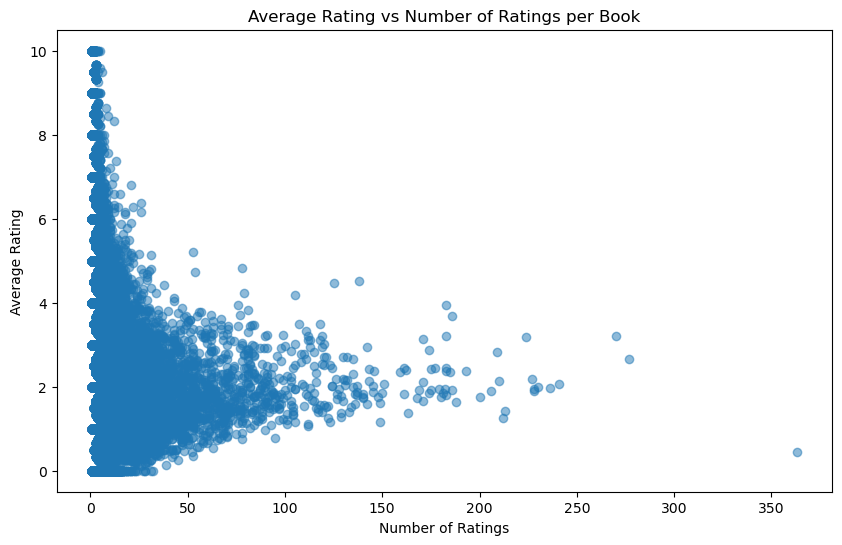

In [54]:
import matplotlib.pyplot as plt

# Assuming 'book_ratings' is a DataFrame containing 'book_id', 'rating', and 
# 'number_of_ratings'
book_ratings_summary = ratings_with_books.groupby('title').agg(
    avg_rating=('rating', 'mean'), 
    num_ratings=('rating', 'count')
).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(book_ratings_summary['num_ratings'], book_ratings_summary['avg_rating'], 
            alpha=0.5)
plt.title("Average Rating vs Number of Ratings per Book")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

### Conclusion

##### This recommendation system uses collaborative filtering based on user ratings to suggest similar books to readers. By focusing on books with a significant number of ratings and active users, the algorithm efficiently finds books with similar appeal based on shared user preferences. The visualizations help identify books that are not only highly rated but also widely read, which can be valuable in recommending popular titles.